In [4]:

from sponet import CNVM
from sponet import CNVMParameters
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

from sponet import CNVMParameters, sample_many_runs, calc_rre_traj
from sponet.collective_variables import OpinionShares
from sponet.network_generator import ErdosRenyiGenerator

num_nodes = 500
r = np.array([[0, 1.1], [1.1, 0]])
r_tilde = np.array([[0, 0.1], [0.1, 0]])
network = nx.erdos_renyi_graph(n=num_nodes, p=0.1)

cv = OpinionShares(2, normalize=True)

params = CNVMParameters(
    num_opinions=2,
    network=network,
    r=r,
    r_tilde=r_tilde
)



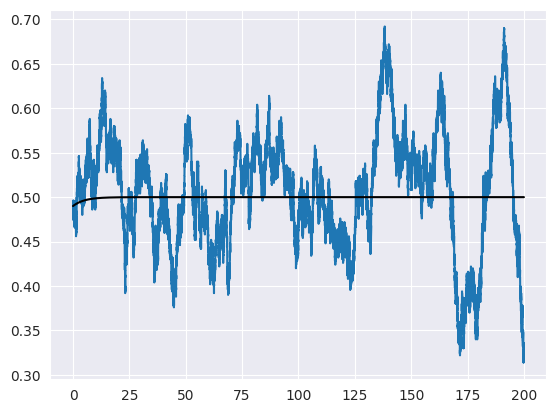

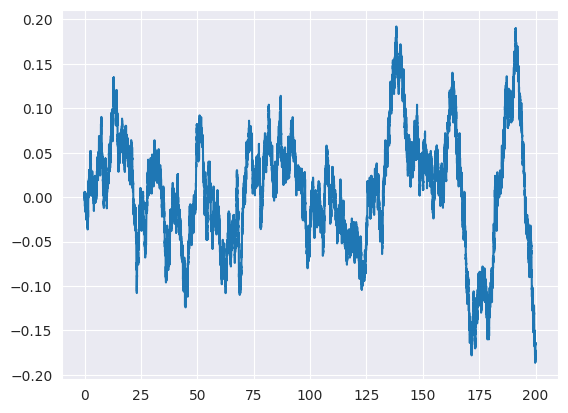

In [7]:
t_max = 200
x_init = np.random.randint(0, 2, num_nodes)

model = CNVM(params)
t, x = model.simulate(t_max, x_init=x_init)

init_mean = np.mean(x_init)
projected_state = (1-init_mean, init_mean)
t_rre, c_rre = calc_rre_traj(params, projected_state, t[-1], t_eval=t)


plt.plot(t, np.mean(x[:, :], axis=1), label=f"")
plt.plot(t_rre, c_rre[:, 1], "k", label="RRE")
plt.show()

plt.plot(t, np.mean(x[:,:], axis=1) - c_rre[:,1])


In [3]:
(t.shape)


(199889,)